In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm
import os

In [40]:
img = cv2.imread('./data/22/20210215022810.JPEG')

rgb = img[:,:,::-1]

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

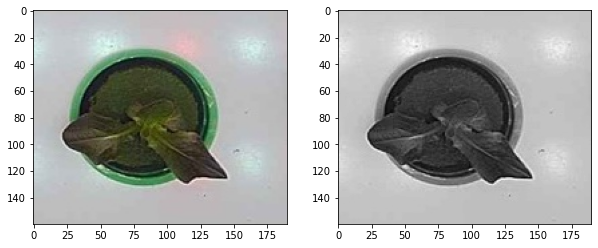

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb)
ax[1].imshow(gray, 'gray')

In [67]:
def tfb_filter(img):
    rgb = img[:,:,::-1]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = lab[:, :, 0], lab[:, :, 1], lab[:, :, 2]

    low_sigma = cv2.GaussianBlur(l, (9,9), sigmaX=1)
    high_sigma = cv2.GaussianBlur(l, (9,9), sigmaX=4)

    blur = cv2.blur(a,(3,3))
    # Calculate the DoG by subtracting
    dog = low_sigma - high_sigma

    tfb = np.exp((-1/300)*np.abs(blur + dog))

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(rgb)
    ax[1].imshow(tfb, 'gray')

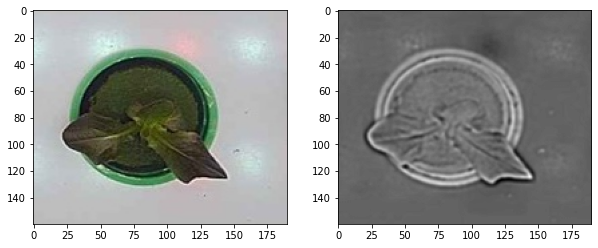

In [68]:
tfb_filter(img)

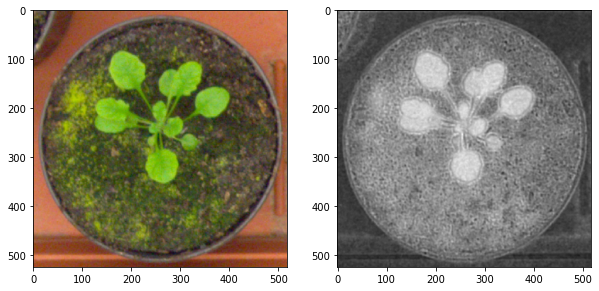

In [69]:
paper_img = cv2.imread('./data/paper_v1.png')
tfb_filter(paper_img)

Text(0.5, 1.0, 'b*')

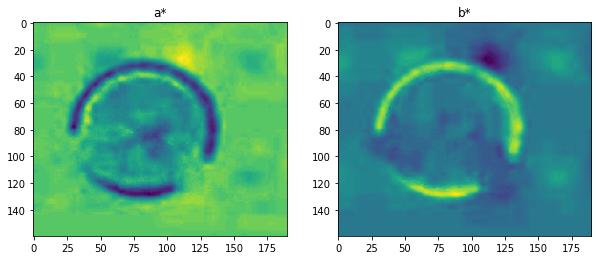

In [82]:
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
l, a, b = lab_img[:, :, 0], lab_img[:, :, 1], lab_img[:, :, 2]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(a)
ax[0].set_title('a*')
ax[1].imshow(b)
ax[1].set_title('b*')

Text(0.5, 1.0, 'V')

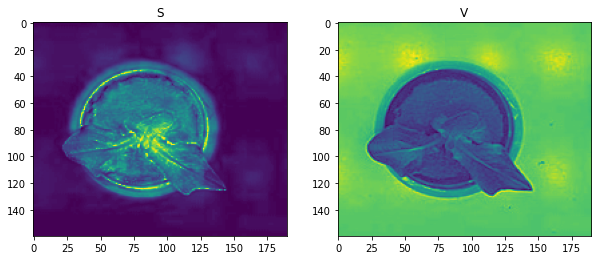

In [81]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(s)
ax[0].set_title('S')
ax[1].imshow(v)
ax[1].set_title('V')

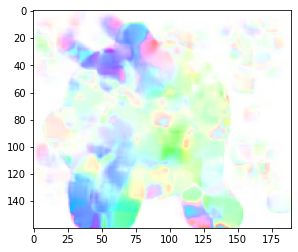

In [85]:
img1 = cv2.imread('./data/22/20210218142946.JPEG')
img2 = cv2.imread('./data/22/20210218152947.JPEG')  

prvs = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(img1)
hsv[..., 1] = 255

    
hsv = np.zeros_like(img1)
next = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs, next, None, pyr_scale=0.5, winsize=8, iterations=50, poly_n=100, 
                                        levels = 10, poly_sigma=1.5, flags = 0) 
        

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        
hsv[...,0] = ang*180/np.pi
hsv[...,1] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
hsv[...,2] = 255

rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rgb)

In [91]:
img = cv2.imread('./data/22-markdown/20210215002808.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)

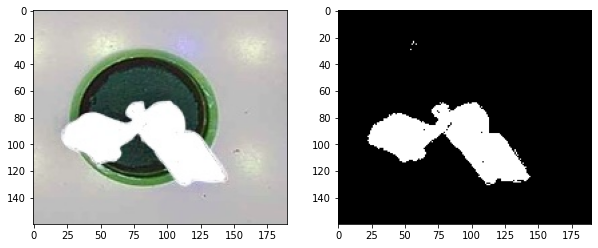

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[1].imshow(blackAndWhiteImage, 'gray')

In [97]:
source_dir = './data/22-markdown/'

In [114]:
leaf_counter = []
for i, file_name in enumerate(tqdm(sorted(os.listdir(source_dir)))):
    img = cv2.imread(source_dir + file_name)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)
    leaf = cv2.countNonZero(blackAndWhiteImage)
    leaf_counter.append(leaf)    

In [115]:
leaf_counter = np.array(leaf_counter)

Text(0, 0.5, 'n_pixels')

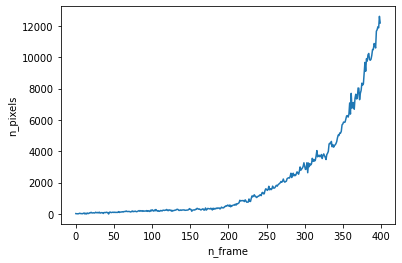

In [116]:
plt.plot(leaf_counter[:400])
plt.xlabel('n_frame')
plt.ylabel('n_pixels')

Text(0, 0.5, 'n_pixels')

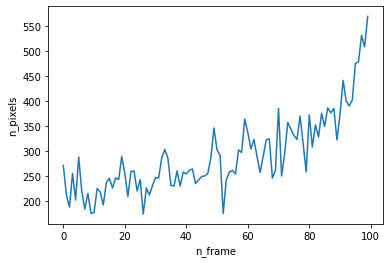

In [117]:
plt.plot(leaf_counter[100:200])
plt.xlabel('n_frame')
plt.ylabel('n_pixels')